# **1. Установка зависимостей**

In [2]:
# PyTorch 
%pip install -U "torch==2.2.2" "torchvision==0.17.2" "torchaudio==2.2.2"

# Установщик OpenMMLab
%pip install -U openmim ninja cmake setuptools wheel

# MMEngine и MMCV 2.1.x
!mim install "mmengine>=0.10,<0.11"

# Чистим кеш
%pip cache purge

# Собираем из исходников без изоляции билда
%pip install -v --no-binary=mmcv --no-build-isolation "mmcv==2.1.0"

# MMDetection для авто-детекции людей 3.2.x
!mim install "mmdet==3.2.0"

# MMPose 1.x
!mim install "mmpose==1.3.2"

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.12.0-py3-none-any.whl.metadata (10 kB)
  Using cached markupsafe-3.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00a 0:00:01
Using cached fsspec-2025.12.0-py3-none-any.whl (201 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp311-cp311-macosx_11_0_arm64.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00a 0:00:01
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# %pip install -U gdown imageio-ffmpeg --quiet
# %pip install -q -U imageio imageio-ffmpeg
%pip uninstall numpy
%pip install -U "numpy==1.26.4" cython

# снесём и пересоберём оба COCO-пакета
%pip uninstall -y xtcocotools pycocotools
%pip install --no-binary=xtcocotools,pycocotools --no-cache-dir xtcocotools pycocotools

# на всякий случай переустановим mmpose (поверх тех же версий)
# %pip install -U --no-cache-dir "mmpose==1.3.2"

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/venv311/bin/f2py
    /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/venv311/lib/python3.11/site-packages/numpy-1.26.4.dist-info/*
    /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/venv311/lib/python3.11/site-packages/numpy/*
Proceed (Y/n)? ^C
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  DEPRECATION: Building 'xtcocotools' using the leg

### Перезапускаем ядро, проверяем версии

In [3]:
import importlib
import platform
import sys

import numpy as np
import torch
import xtcocotools._mask as _mask
from mmpose.apis import MMPoseInferencer


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/venv311/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/venv311/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/pussykiller/У

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
def _ver(pkg):
    try:
        m = importlib.import_module(pkg)
        return getattr(m, "__version__", "N/A")
    except Exception as e:
        return f"not installed ({e})"


print("Platform:", platform.platform())
print("Python:", sys.version)
print("\ntorch:", _ver("torch"))
print("torchvision:", _ver("torchvision"))
print("mmengine:", _ver("mmengine"))
print("mmcv:", _ver("mmcv"))
print("mmdet:", _ver("mmdet"))
print("\nMMPoseInferencer import OK")
print("mmpose:", _ver("mmpose"))
print("\nxtcocotools with numpy version:", _ver("numpy"))


print(
    "\nDevice selected:", "mps" if torch.backends.mps.is_available() else "cpu"
)

Platform: macOS-15.6.1-arm64-arm-64bit
Python: 3.11.13 (main, Jun  3 2025, 18:38:25) [Clang 17.0.0 (clang-1700.0.13.3)]

torch: 2.2.2
torchvision: 0.17.2
mmengine: 0.10.7
mmcv: 2.1.0
mmdet: 3.2.0

MMPoseInferencer import OK
mmpose: 1.3.2

xtcocotools with numpy version: 2.2.6

Device selected: mps


# **2. Каталоги проекта**

In [1]:
from pathlib import Path

In [2]:
BASE_DIR = Path(".").resolve()
INPUT_DIR = BASE_DIR / "input_compare_angles"
OUTPUT_DIR = BASE_DIR / "output_compare_angles"
WEIGHTS_DIR = BASE_DIR / "weights"
INPUT_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
WEIGHTS_DIR.mkdir(parents=True, exist_ok=True)

print("BASE_DIR =", BASE_DIR)
print("INPUT_DIR =", INPUT_DIR)
print("OUTPUT_DIR =", OUTPUT_DIR)
print("WEIGHTS_DIR =", WEIGHTS_DIR)

BASE_DIR = /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose
INPUT_DIR = /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/input_compare_angles
OUTPUT_DIR = /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles
WEIGHTS_DIR = /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/weights


# **3. Скачиваем эталонное видео отжиманий с GoogleDrive**

In [3]:
import os
from pathlib import Path

import cv2
import gdown

In [ ]:
# Ссылка на видео с открытым доступом
GD_URL = "https://drive.google.com/file/d/16oXTN855iu2sE0H91NS5DdPIi4jijajA/view?usp=share_link"
video_pth = INPUT_DIR / "RARE_PUSH-UPS_INPUT.mp4"

# GD_URL = "https://drive.google.com/file/d/1LsHuMbXDsWbKJCm2yqo9xZDQIQC9pOqs/view?usp=share_link"
# video_pth = INPUT_DIR / "BAD_PUSH-UPS_INPUT.mp4"

video_pth.unlink(missing_ok=True)
gdown.download(GD_URL, str(video_pth), quiet=False, fuzzy=True)

# Проверяем, что файл появился и не пустой
assert (
    video_pth.exists() and video_pth.stat().st_size > 1000
), f"Видео не скачалось: {video_pth}"
print(f"\nВидео успешно скачано: {video_pth}")
print(f"Размер файла: {video_pth.stat().st_size / 1024:.1f} KB")

# Открываем видео через OpenCV
cap = cv2.VideoCapture(str(video_pth))
if not cap.isOpened():
    raise RuntimeError(f"Не удалось открыть видео: {video_pth}")

fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) or 0)
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) or 0)
n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
cap.release()

print(f"Видео: {w}x{h}px, {fps:.2f} FPS, кадров: {n}")

Downloading...
From: https://drive.google.com/uc?id=16oXTN855iu2sE0H91NS5DdPIi4jijajA
To: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/input_compare_angles/RARE_PUSH-UPS_INPUT.mp4
100%|██████████| 4.67M/4.67M [00:01<00:00, 3.21MB/s]



Видео успешно скачано: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/input_compare_angles/RARE_PUSH-UPS_INPUT.mp4
Размер файла: 4559.7 KB
Видео: 640x480px, 29.97 FPS, кадров: 297


In [115]:
import cv2, imageio, numpy as np, torch, os
from pathlib import Path
from mmpose.apis import MMPoseInferencer

# Пути и устройство
device = "cpu"  # на macOS так избегаем проблемы NMS на MPS
out_dir = OUTPUT_DIR / "tiktonik_pose"

# Инициализируем единый инференсер с alias "human"
# (под капотом подтянет RTMDet для людей + 2D-позу; умеет видео/изображения;
# настраиваемые radius/thickness)
inferencer = MMPoseInferencer(
    "human",
    device=device,
)

# Готовим writer с кодеком H.264
vis_dir = out_dir / "visualization"
vis_dir.mkdir(parents=True, exist_ok=True)
out_video = vis_dir / (video_pth.stem + "_pose.mp4")

writer = imageio.get_writer(
    out_video.as_posix(),
    fps=fps,
    codec="libx264",
    format="FFMPEG",
    output_params=["-pix_fmt", "yuv420p"],
)

# Запускаем ленивый генератор инференса по видео.
# Чтобы получать кадры с отрисовкой в Python, включаем return_vis=True
# и задаем толщину/радиус. При желании можно включить/выключить рамки:
# draw_bbox=True/False.
result_gen = inferencer(
    str(video_pth),
    show=False,
    return_vis=True,
    radius=12,
    thickness=6,
    draw_bbox=False,
)

# Пробегаем все результаты и пишем в MP4
frames_written = 0
for res in result_gen:
    # 1) Заберём визуализацию (может быть списком или None)
    vis = res.get("visualization")
    if isinstance(vis, list):
        vis = vis[0] if vis else None

    # 2) Если отрисовка вернулась путём (бывает), читаем с диска
    if vis is None:
        vis_path = res.get("visualization_path")
        if isinstance(vis_path, list):
            vis_path = vis_path[0] if vis_path else None
        if vis_path:
            vis = imageio.v2.imread(vis_path)  # RGB

    if vis is None:
        continue  # нечего писать

    # 3) Приводим к RGB uint8 HxWx3
    frame = np.asarray(vis)
    if frame.ndim == 2:  # если ч/б
        frame = np.repeat(frame[..., None], 3, axis=2)
    elif (
        frame.ndim == 3 and frame.shape[2] == 4
    ):  # если RGBA — отбрасываем альфу
        frame = frame[..., :3]
    if frame.dtype != np.uint8:
        frame = np.clip(frame, 0, 255).astype(np.uint8)

    # 4) Подгоним размер под исходное видео (на всякий)
    if frame.shape[1] != w or frame.shape[0] != h:
        frame = cv2.resize(frame, (w, h), interpolation=cv2.INTER_LINEAR)

    # 5) Пишем в MP4 (imageio ожидает RGB)
    writer.append_data(frame)
    frames_written += 1
    if frames_written % 50 == 0:
        print(f"Обработано кадров: {frames_written}")

writer.close()
print(f"Готово! Сохранено кадров: {frames_written}")
print("Выходной файл:", out_video)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


[vost#0:0/libx264 @ 0x115e04f80] Multiple -pix_fmt options specified for stream 0, only the last option '-pix_fmt yuv420p' will be used.


Обработано кадров: 50
Обработано кадров: 100
Обработано кадров: 150
Обработано кадров: 200
Обработано кадров: 250
Готово! Сохранено кадров: 297
Выходной файл: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/tiktonik_pose/visualization/RARE_PUSH-UPS_INPUT_pose.mp4


# **4. Прогоняем MMPose по эталонному видео и сохраняем скелетики (kpts/scores)**

In [64]:
import numpy as np
import torch
from mmpose.apis import MMPoseInferencer
from tqdm import tqdm

##### Запуск ```MMPoseInferencer``` — готового high-level API из MMPose, который внутри:
* автоматически использует детектор людей (из mmdet) для поиска человека на каждом кадре;
* применяет модель 2D-позы (pose2d="human") для предсказания 17 ключевых точек (COCO-формат);
* отрисовывает результат на кадрах (файлы в vis_ref);
* сохраняет координаты и confidence-оценки каждой точки (в reference_keypoints.npz и preds_ref).


In [ ]:
DEVICE = "cpu"

# Директории вывода
VIS_DIR = OUTPUT_DIR / "vis_ref"
PRED_DIR = OUTPUT_DIR / "preds_ref"
VIS_DIR.mkdir(parents=True, exist_ok=True)
PRED_DIR.mkdir(parents=True, exist_ok=True)

inferencer = MMPoseInferencer(pose2d="human", device=DEVICE)

result_gen = inferencer(
    str(video_pth),
    vis_out_dir=str(VIS_DIR),
    pred_out_dir=str(PRED_DIR),
    show=False,
    return_vis=False,
    radius=4,
    thickness=2,
)

all_kpts, all_scores = [], []
num_frames = 0

for res in tqdm(result_gen, desc="MMPose (reference)"):
    preds = res.get("predictions", [[]])[0]  # позы на кадре
    if len(preds) == 0:
        all_kpts.append(np.full((17, 2), np.nan, dtype=np.float32))
        all_scores.append(np.full((17,), np.nan, dtype=np.float32))
    else:
        best = max(
            preds, key=lambda p: float(np.mean(p.get("keypoint_scores", [0])))
        )
        all_kpts.append(np.array(best["keypoints"], dtype=np.float32))
        all_scores.append(np.array(best["keypoint_scores"], dtype=np.float32))
    num_frames += 1

kpts = np.stack(all_kpts, axis=0)  # (T, 17, 2)
scores = np.stack(all_scores, axis=0)  # (T, 17)

npz_path = OUTPUT_DIR / "reference_keypoints.npz"
np.savez(npz_path, kpts=kpts, scores=scores)

print("Сохранено:", npz_path)
print("\nkpts shape:", kpts.shape, "\t|\tscores shape:", scores.shape)
print("\nВизуализации:", VIS_DIR)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


MMPose (reference): 297it [01:26,  3.57it/s]

11/06 19:14:50 - mmengine - INFO - the output video has been saved at /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/vis_ref/RARE_PUSH-UPS_INPUT.mp4


MMPose (reference): 297it [01:26,  3.44it/s]

Сохранено: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/reference_keypoints.npz

kpts shape: (297, 17, 2) 	|	scores shape: (297, 17)

Визуализации: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/vis_ref


##### 1. Получили ```output_compare_angles/reference_keypoints.npz``` — основной файл:
* **kpts**: массив размером (297, 17, 2) — для каждого из 297 кадров по 17 точек (x, y координаты);
* **scores**: массив (297, 17) — confidence (насколько уверена модель в каждой точке);

##### 2. Получили ```output_compare_angles/vis_ref/RARE_PUSH-UPS_INPUT.mp4``` — визуализация: кадры видео с наложенными «скелетиками».

##### 3. Получили ```output_compare_angles/preds_ref/RARE_PUSH-UPS_INPUT.json``` — JSON-предсказания, если нужны покадровые детали (точки, оценки, bbox).

##### Теперь для каждого кадра известно:
* где находятся плечи, локти, запястья, бёдра, колени, лодыжки, голова;
* насколько точно это определено.

# **5. Загрузка скелетов, чистка пропусков и нормализация, визуализауия до/после**

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
# 1. Загружаем скелеты
NPZ_PATH = OUTPUT_DIR / "reference_keypoints.npz"
data = np.load(NPZ_PATH)
kpts = data["kpts"].astype(np.float32)  # (T,17,2)
scores = data["scores"].astype(np.float32)  # (T,17)
T = kpts.shape[0]

print("Загружено:", NPZ_PATH)
print("\nkpts shape:", kpts.shape, "\t|\tscores shape:", scores.shape)

Загружено: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/reference_keypoints.npz

kpts shape: (297, 17, 2) 	|	scores shape: (297, 17)


In [68]:
# Индексы COCO-17
COCO = dict(
    nose=0,
    l_eye=1,
    r_eye=2,
    l_ear=3,
    r_ear=4,
    l_sho=5,
    r_sho=6,
    l_elb=7,
    r_elb=8,
    l_wri=9,
    r_wri=10,
    l_hip=11,
    r_hip=12,
    l_kne=13,
    r_kne=14,
    l_ank=15,
    r_ank=16,
)

COCO_EDGES = [
    (5, 7),
    (7, 9),
    (6, 8),
    (8, 10),
    (11, 13),
    (13, 15),
    (12, 14),
    (14, 16),
    (5, 6),
    (11, 12),
    (5, 11),
    (6, 12),
    (0, 5),
    (0, 6),
]

In [69]:
# 2. Заполнение NaN по времени линейной интерполяцией
def _fill_nans_timewise(arr):
    arr = arr.copy()
    t = arr.shape[0]
    if arr.ndim == 1:
        arr = arr[:, None]
    idx = np.arange(t)
    for d in range(arr.shape[1]):
        x = arr[:, d]
        nans = ~np.isfinite(x)
        if nans.any() and (~nans).any():
            x[nans] = np.interp(idx[nans], idx[~nans], x[~nans])
        arr[:, d] = x
    return arr.squeeze()


for j in range(17):
    kpts[:, j, 0] = _fill_nans_timewise(kpts[:, j, 0])
    kpts[:, j, 1] = _fill_nans_timewise(kpts[:, j, 1])
    scores[:, j] = _fill_nans_timewise(scores[:, j])

In [70]:
# 3. Функциия нормализации
def normalize_skeleton(k):
    lhip, rhip = COCO["l_hip"], COCO["r_hip"]
    lsho, rsho = COCO["l_sho"], COCO["r_sho"]
    out = k.copy()
    mid_hip = (out[:, lhip, :] + out[:, rhip, :]) / 2.0
    out -= mid_hip[:, None, :]
    shoulder_w = np.linalg.norm(out[:, lsho, :] - out[:, rsho, :], axis=1)
    ok = np.isfinite(shoulder_w) & (shoulder_w > 1e-6)
    scale = np.median(shoulder_w[ok]) if ok.any() else 1.0
    shoulder_w = np.where(ok, shoulder_w, scale)
    out /= shoulder_w[:, None, None]
    return out

In [71]:
# 4. Функциия отрисовки
def draw_skeleton(ax, pts, title="", invert_y=True):
    pts = np.asarray(pts)
    for i, j in COCO_EDGES:
        if np.all(np.isfinite(pts[i])) and np.all(np.isfinite(pts[j])):
            ax.plot([pts[i, 0], pts[j, 0]], [pts[i, 1], pts[j, 1]], lw=2)
    ax.scatter(pts[:, 0], pts[:, 1], s=25, color="C1")
    ax.set_title(title)
    ax.set_aspect("equal", "box")
    if invert_y:
        ax.invert_yaxis()
    ax.grid(True, alpha=0.2)

In [72]:
# 5. Нормализуем
k_norm = normalize_skeleton(kpts)
print("Normalized skeleton shape:", k_norm.shape)

Normalized skeleton shape: (297, 17, 2)


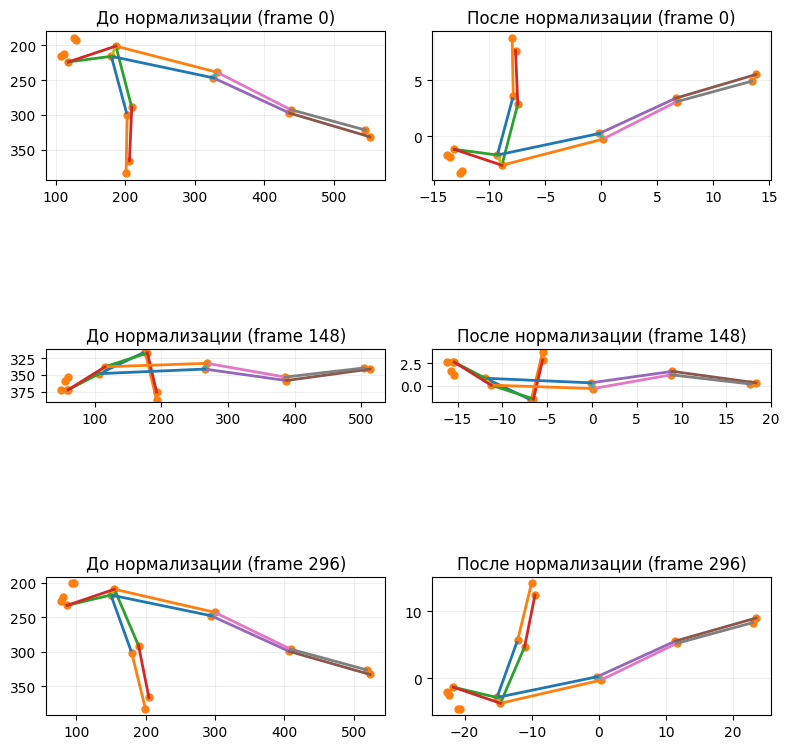

In [73]:
# 6. Визуализируем: до / после
frames_to_show = [0, T // 2, T - 1]  # первый, середина, последний

fig, axes = plt.subplots(
    len(frames_to_show), 2, figsize=(8, 3 * len(frames_to_show))
)
if len(frames_to_show) == 1:
    axes = np.array([axes])

for row, t in enumerate(frames_to_show):
    ax1, ax2 = axes[row, 0], axes[row, 1]
    draw_skeleton(
        ax1, kpts[t], title=f"До нормализации (frame {t})", invert_y=True
    )
    draw_skeleton(
        ax2, k_norm[t], title=f"После нормализации (frame {t})", invert_y=False
    )

plt.tight_layout()
plt.show()

##### 1. Что делает нормализация:
* Перенос центра в середину таза (среднее между левым и правым бедром) -> теперь точка таза находится в (0, 0);
* Масштабирование по ширине плеч - расстояние между левым и правым плечом становится ≈ 1 -> теперь все координаты выражены в «долях от ширины плеч», а не в пикселях;
* Сохраняется относительная геометрия, но теряется ориентация по кадру - мы «отвязали» позу от исходного изображения: теперь это просто абстрактная фигура, где таз = центр, плечи = около (±0.5, ≈1), ноги ≈ (±0.5, −2) — и всё в безразмерных единицах.

##### 2. Почему скелет перевернулся:
* На видео система координат OpenCV:
    * X стремится вправо;
    * Y стремится вниз.

А при визуализации нормализованной позы мы рисуем ось Y обычным образом (вверх). Поэтому после нормализации фигура кажется «перевёрнутой». Реально — не переворот тела, а просто разница систем координат: одна — пиксельная, другая — математическая.  
То есть, «переворот» — это не ошибка, а просто мы теперь смотрим на тот же скелет в другой системе координат: с центром в тазу и с нормальной осью Y (вверх).

##### 3. Что мы получили:
* Массив k_norm (297×17×2) — теперь каждая поза:
    * центрирована относительно таза;
    * приведена к единому масштабу;
    * пригодна для сравнения между кадрами и видео разных людей (все в одинаковых координатах).
* Это и есть нормализованные позы, которые мы будем использовать для:
    * вычисления углов между суставами;
    * анализа движения по фазам (0–100 %);
    * построения эталонного профиля.


# **6. Считаем углы, сглаживаем шум и визуализируем на графиках**

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [75]:
T = k_norm.shape[0]
LSH, RSH = COCO["l_sho"], COCO["r_sho"]
LEL, REL = COCO["l_elb"], COCO["r_elb"]
LWR, RWR = COCO["l_wri"], COCO["r_wri"]
LHP, RHP = COCO["l_hip"], COCO["r_hip"]
LKN, RKN = COCO["l_kne"], COCO["r_kne"]
LAN, RAN = COCO["l_ank"], COCO["r_ank"]

In [76]:
def angle_ABC(A, B, C, eps=1e-6):
    BA, BC = A - B, C - B
    na, nc = np.linalg.norm(BA) + eps, np.linalg.norm(BC) + eps
    cosv = np.clip(np.dot(BA, BC) / (na * nc), -1.0, 1.0)
    return np.degrees(np.arccos(cosv))

In [77]:
def compute_angles_series(k):
    T = k.shape[0]
    mid_sh = (k[:, LSH, :] + k[:, RSH, :]) / 2.0
    mid_hp = (k[:, LHP, :] + k[:, RHP, :]) / 2.0
    A = {}
    A["elbow_left"] = np.array(
        [angle_ABC(k[t, LSH], k[t, LEL], k[t, LWR]) for t in range(T)]
    )
    A["elbow_right"] = np.array(
        [angle_ABC(k[t, RSH], k[t, REL], k[t, RWR]) for t in range(T)]
    )
    A["shoulder_left"] = np.array(
        [angle_ABC(k[t, LEL], k[t, LSH], k[t, LHP]) for t in range(T)]
    )
    A["shoulder_right"] = np.array(
        [angle_ABC(k[t, REL], k[t, RSH], k[t, RHP]) for t in range(T)]
    )
    A["hip_left"] = np.array(
        [angle_ABC(k[t, LSH], k[t, LHP], k[t, LKN]) for t in range(T)]
    )
    A["hip_right"] = np.array(
        [angle_ABC(k[t, RSH], k[t, RHP], k[t, RKN]) for t in range(T)]
    )
    A["knee_left"] = np.array(
        [angle_ABC(k[t, LHP], k[t, LKN], k[t, LAN]) for t in range(T)]
    )
    A["knee_right"] = np.array(
        [angle_ABC(k[t, RHP], k[t, RKN], k[t, RAN]) for t in range(T)]
    )
    # угол корпуса (наклон вектора mid_hip->mid_shoulder к горизонтали)
    v = mid_sh - mid_hp
    A["trunk_tilt"] = np.degrees(np.arctan2(v[:, 1], v[:, 0]))
    return A

In [78]:
angles = compute_angles_series(k_norm)
print("Углы посчитаны:", list(angles.keys()))
print("Кадров:", len(angles["elbow_left"]))

Углы посчитаны: ['elbow_left', 'elbow_right', 'shoulder_left', 'shoulder_right', 'hip_left', 'hip_right', 'knee_left', 'knee_right', 'trunk_tilt']
Кадров: 297


### **Параметры + обработка рядов**

In [79]:
# Параметры обработки
PHASE_POINTS = 101  # сколько точек в фазовом профиле (0..100%)
SMOOTH_WIN = 11  # окно сглаживания (нечётное), ~0.3 сек при 30 FPS
SMOOTH_POLY = 2  # степень полинома для Savitzky–Golay
GLITCH_THR_DEG = 35.0  # порог “иглы”: скачок > 35° считаем выбросом
MIN_REP_SEC = 0.25  # минимальная длительность полуцикла (сек) для поиска пиков

In [80]:
# Утилита: безопасная интерполяция NaN по времени
def interp_nans_1d(x: np.ndarray) -> np.ndarray:
    """
    Линейно заполняет NaN в 1D ряду (если край — тянем ближайшее валидное).
    """
    x = x.astype(float).copy()
    n = len(x)
    idx = np.arange(n)
    bad = ~np.isfinite(x)
    if bad.all():
        return np.zeros_like(x)
    if bad.any():
        # заполним внутренние NaN линейно
        x[bad] = np.interp(idx[bad], idx[~bad], x[~bad])
        # дотянем края, если вдруг NaN были в начале/конце
        if not np.isfinite(x[0]):
            x[0] = x[np.isfinite(x)][0]
        if not np.isfinite(x[-1]):
            x[-1] = x[np.isfinite(x)][-1]
    return x

In [81]:
# Утилита: разворачивание углов (устраняет прыжки +180 - −180)
def unwrap_deg(x: np.ndarray, center: float = 0.0) -> np.ndarray:
    """
    Разворачивает угловой ряд в градусах. center=0 даст непрерывность вокруг 0°,
    для наклона корпуса это то, что нужно (не будет “прыжков” из +180 в -180).
    """
    rad = np.deg2rad(x - center)
    unwrapped = np.unwrap(rad)
    return np.rad2deg(unwrapped) + center

In [82]:
# Утилита: сглаживание (Savitzky–Golay, если доступен; иначе скользящее среднее)
def smooth_series(
    x: np.ndarray, win=SMOOTH_WIN, poly=SMOOTH_POLY
) -> np.ndarray:
    x = x.astype(float)
    try:
        from scipy.signal import savgol_filter

        w = win if win % 2 == 1 else win + 1  # окно обязано быть нечётным
        w = min(w, len(x) - (1 - len(x) % 2)) if len(x) > 5 else 5
        w = w if w % 2 == 1 else w - 1
        w = max(w, 5)
        return savgol_filter(
            x, window_length=w, polyorder=min(poly, 3), mode="interp"
        )
    except Exception:
        # fallback: простое скользящее среднее
        k = max(3, win if win % 2 == 1 else win + 1)
        pad = k // 2
        xx = np.pad(x, (pad, pad), mode="edge")
        ker = np.ones(k) / k
        return np.convolve(xx, ker, mode="valid")

In [83]:
# Утилита: удаление одиночных “игл” в градусах
def deglitch_series(
    x: np.ndarray, thr_deg: float = GLITCH_THR_DEG
) -> np.ndarray:
    """
    Находим резкие скачки по первой разности и заменяем их линейной интерполяцией.
    """
    x = x.astype(float).copy()
    d = np.diff(x, prepend=x[0])
    spikes = np.abs(d) > thr_deg
    if spikes.any():
        x[spikes] = np.nan
        x = interp_nans_1d(x)
    return x

In [84]:
# Обёртка: обработать угловой ряд (порядок важен)
def clean_angle_series(x: np.ndarray, unwrap=False) -> np.ndarray:
    x1 = deglitch_series(x)  # убираем одиночные выбросы
    x2 = (
        unwrap_deg(x1) if unwrap else x1
    )  # разворачиваем, если угловая природа “цикличная”
    x3 = smooth_series(x2)  # сглаживаем
    return x3

### **Применяем обработку к углам + контрольные графики**

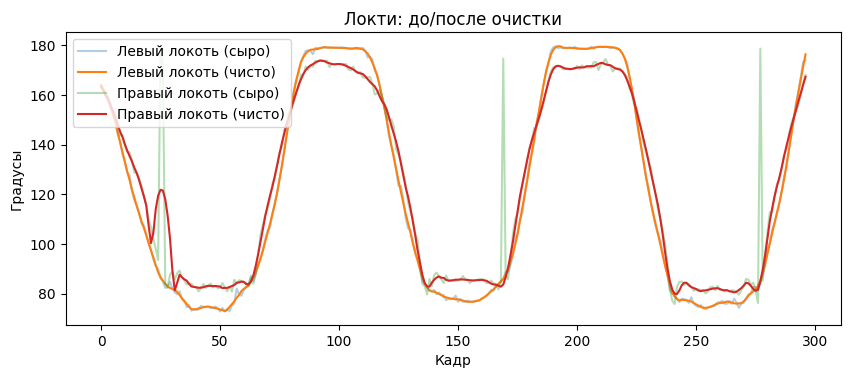

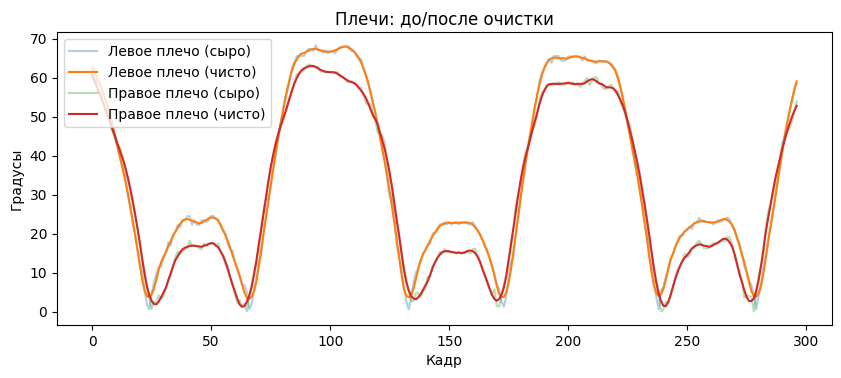

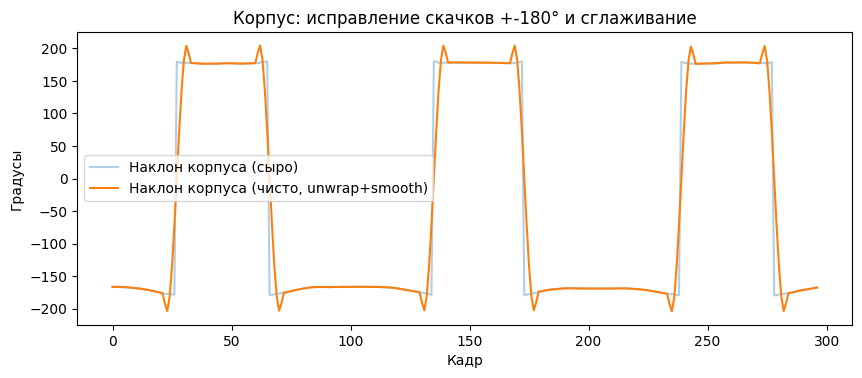

In [85]:
# очистим все углы; для наклона корпуса включим разворачивание
angles_clean = {}
for name, arr in angles.items():
    if name == "trunk_tilt":
        angles_clean[name] = clean_angle_series(arr, unwrap=True)
    else:
        angles_clean[name] = clean_angle_series(arr, unwrap=False)

# Графики основных углов во времени
plt.figure(figsize=(10, 3.8))
plt.plot(angles["elbow_left"], alpha=0.35, label="Левый локоть (сыро)")
plt.plot(angles_clean["elbow_left"], label="Левый локоть (чисто)")
plt.plot(angles["elbow_right"], alpha=0.35, label="Правый локоть (сыро)")
plt.plot(angles_clean["elbow_right"], label="Правый локоть (чисто)")
plt.title("Локти: до/после очистки")
plt.xlabel("Кадр")
plt.ylabel("Градусы")
plt.legend()
plt.show()

plt.figure(figsize=(10, 3.8))
plt.plot(angles["shoulder_left"], alpha=0.35, label="Левое плечо (сыро)")
plt.plot(angles_clean["shoulder_left"], label="Левое плечо (чисто)")
plt.plot(angles["shoulder_right"], alpha=0.35, label="Правое плечо (сыро)")
plt.plot(angles_clean["shoulder_right"], label="Правое плечо (чисто)")
plt.title("Плечи: до/после очистки")
plt.xlabel("Кадр")
plt.ylabel("Градусы")
plt.legend()
plt.show()

plt.figure(figsize=(10, 3.8))
plt.plot(angles["trunk_tilt"], alpha=0.35, label="Наклон корпуса (сыро)")
plt.plot(
    angles_clean["trunk_tilt"], label="Наклон корпуса (чисто, unwrap+smooth)"
)
plt.title("Корпус: исправление скачков +-180° и сглаживание")
plt.xlabel("Кадр")
plt.ylabel("Градусы")
plt.legend()
plt.show()

angles = angles_clean

# **7. Находим повторы на эталоне, приводим их к фазе 0-100%, сохраняем в json**

In [89]:
# Поиск вершин (верхних точек) по среднему углу локтей
# Идея: вверху отжимания локти ~прямые -> локтевой угол максимум
elbow_mean = (angles["elbow_left"] + angles["elbow_right"]) / 2.0

min_peak_dist_frames = max(
    1, int(fps * MIN_REP_SEC)
)  # минимальная «дистанция» между вершинами
prom = 5.0  # требуемая выраженность пика в градусах

try:
    from scipy.signal import find_peaks

    peaks, props = find_peaks(
        elbow_mean, prominence=prom, distance=min_peak_dist_frames
    )
except Exception:
    # Фоллбек без scipy: находим локальные максимумы грубой эвристикой
    x = elbow_mean
    cand = np.where(
        (np.r_[True, x[1:] >= x[:-1]] & np.r_[x[:-1] > x[1:], True])
    )[0]
    # прореживаем по минимальному расстоянию
    peaks = []
    last = -(10**9)
    for i in cand:
        if i - last >= min_peak_dist_frames:
            peaks.append(i)
            last = i
    peaks = np.array(peaks, dtype=int)
    props = {}

print(f"Найдено вершин (верхов): {len(peaks)} -> индексы: {peaks}")

Найдено вершин (верхов): 3 -> индексы: [ 25  94 210]


In [90]:
# Превращаем вершины в интервалы повторов [start, end]
# Берём пары соседних вершин как границы одноГО повтора.
# Отфильтруем слишком короткие «повторы» (меньше ~0.6 сек).
min_rep_len = int(max(6, 0.6 * fps))

reps = []
for i in range(len(peaks) - 1):
    s, e = int(peaks[i]), int(peaks[i + 1])
    if e - s >= min_rep_len:
        reps.append((s, e))

print("Повторы (start, end) и длительность в кадрах/сек:")
for s, e in reps:
    dur_f = e - s
    print(f"  [{s:3d}, {e:3d}]  len={dur_f:3d} frames (~{dur_f/fps:.2f} s)")

if not reps:
    print(
        "Похоже, повторы не нашлись — подними/понизь 'prom' или MIN_REP_SEC."
    )

Повторы (start, end) и длительность в кадрах/сек:
  [ 25,  94]  len= 69 frames (~2.30 s)
  [ 94, 210]  len=116 frames (~3.87 s)


In [91]:
# Утилита: ресемплинг одного повтора в фазу 0..100% (PHASE_POINTS)
def resample_repeat(
    series: np.ndarray, start: int, end: int, n_points: int = PHASE_POINTS
) -> np.ndarray:
    """
    series: 1D ряд по кадрам для какого-то угла.
    [start, end] — границы повтора (включительно правую границу тоже учитываем).
    Возвращает массив длины n_points — значения угла для фаз 0..100%.
    """
    start = int(start)
    end = int(end)
    end = max(end, start + 1)
    idx = np.arange(start, end + 1)
    y = series[start : end + 1]
    # Нормированная шкала текущего повтора (0..1)
    phase_src = (idx - start) / (end - start)
    # Целевая равномерная сетка фаз
    phase_dst = np.linspace(0.0, 1.0, n_points)
    return np.interp(phase_dst, phase_src, y)


# Собираем фазовые профили по всем повторам для каждого угла
phase_profiles = {name: [] for name in angles.keys()}

for s, e in reps:
    for name, series in angles.items():
        phase_profiles[name].append(
            resample_repeat(series, s, e, PHASE_POINTS)
        )

# Преобразуем в np.array и считаем mean/std по повторам
reference = {}
for name, arrs in phase_profiles.items():
    if len(arrs) == 0:
        continue
    A = np.stack(arrs, axis=0)  # shape: (num_reps, PHASE_POINTS)
    m = A.mean(axis=0)  # усреднённый эталон
    s = (
        A.std(axis=0, ddof=1) if A.shape[0] > 1 else np.zeros_like(m)
    )  # std (0 если 1 повтор)
    reference[name] = dict(mean=m, std=s)

print("Сформирован эталон (mean/std) для углов:", list(reference.keys()))

Сформирован эталон (mean/std) для углов: ['elbow_left', 'elbow_right', 'shoulder_left', 'shoulder_right', 'hip_left', 'hip_right', 'knee_left', 'knee_right', 'trunk_tilt']


Эталон сохранён: /Users/pussykiller/Учеба/Семестр 3/Проектный практикум/CV-Workout-Tracker/notebooks/mmpose/output_compare_angles/ideal_reference_profile.json


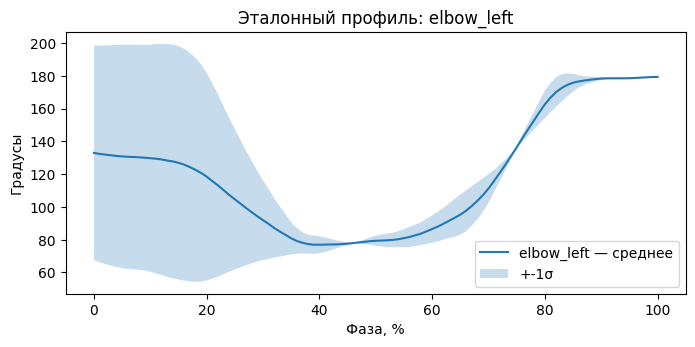

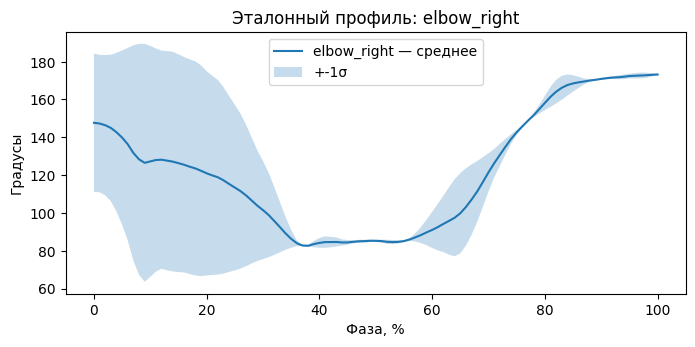

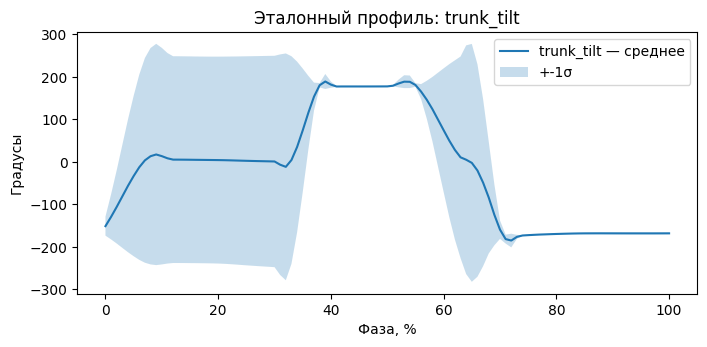

In [92]:
import json
from datetime import datetime

# Подготовим структуру с метаданными и «срезами»
ref_export = {
    "meta": {
        "created_at": datetime.now().isoformat(timespec="seconds"),
        "source_video": str(video_pth),
        "fps": float(fps),
        "phase_points": int(PHASE_POINTS),
        "reps_used": int(len(reps)),
        "smoothing": {
            "method": "savgol_or_ma",
            "window": int(SMOOTH_WIN),
            "poly": int(SMOOTH_POLY),
        },
        "angles": list(reference.keys()),
    }
}
snap_idx = {
    "0": 0,
    "25": PHASE_POINTS // 4,
    "50": PHASE_POINTS // 2,
    "75": 3 * PHASE_POINTS // 4,
    "100": PHASE_POINTS - 1,
}

for name, stats in reference.items():
    m = stats["mean"]
    s = stats["std"]
    ref_export[name] = {
        "mean": m.tolist(),
        "std": s.tolist(),
        "snapshots": {k: float(m[i]) for k, i in snap_idx.items()},
    }

# Сохраняем
json_path = OUTPUT_DIR / "ideal_reference_profile.json"
with open(json_path, "w", encoding="utf-8") as f:
    json.dump(ref_export, f, ensure_ascii=False, indent=2)
print(f"Эталон сохранён: {json_path}")


# Быстрые профили для проверки (3 ключевых угла)
def plot_ref(name):
    import matplotlib.pyplot as plt

    if name not in reference:
        print(f"Нет угла '{name}' в эталоне")
        return
    m = reference[name]["mean"]
    s = reference[name]["std"]
    x = np.linspace(0, 100, PHASE_POINTS)
    plt.figure(figsize=(8, 3.4))
    plt.plot(x, m, label=f"{name} — среднее")
    plt.fill_between(x, m - s, m + s, alpha=0.25, label="+-1σ")
    plt.xlabel("Фаза, %")
    plt.ylabel("Градусы")
    plt.title(f"Эталонный профиль: {name}")
    plt.legend()
    plt.show()


for nm in ["elbow_left", "elbow_right", "trunk_tilt"]:
    plot_ref(nm)

# 8. **Полная обработка нового видео, которое будет сравниваться. Текстовый отчёт.**

In [93]:
import json
import numpy as np
from dataclasses import dataclass
from typing import Dict, Callable, Tuple

### Функция выделяющая и сохраняющая углы выполнения

In [94]:
def extract_angles(
    video_path: str,
    *,
    phase_points: int = PHASE_POINTS,  # 101
    min_rep_sec: float = MIN_REP_SEC,  # 0.25
    prom_deg: float = 5.0,  # требуемая выраженность вершин локтя
    device: str = None,  # "mps"/"cpu"; если None — autodetect
    save_debug: bool = False,  # сохранить kpts/scores и vis при отладке
):
    """
    Возвращает dict {angle_name: np.ndarray[phase_points]} — ОДИН цикл движений.

    Шаги:
      1) MMPose -> kpts/scores покадрово (1 человек).
      2) Подчистка NaN, нормализация скелета.
      3) Углы -> очистка (deglitch/unwrap/smooth).
      4) Поиск повторов по среднему локтевому углу.
      5) Выбор одного «репа» (серединный по длительности) и ресэмпл в 0..100%.
    """
    # 0) FPS видео
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        raise RuntimeError(f"Не удалось открыть видео: {video_path}")
    fps_local = cap.get(cv2.CAP_PROP_FPS) or 25.0
    cap.release()

    # 1) прогон через MMPose
    try:
        _dev = device or (
            "mps" if torch.backends.mps.is_available() else "cpu"
        )
    except Exception:
        _dev = device or "cpu"

    # используем уже созданный inferencer, если он есть; иначе создадим локально
    try:
        _infer = inferencer
        _ = _infer  # проверка на существование
    except NameError:
        from mmpose.apis import MMPoseInferencer

        _infer = MMPoseInferencer(pose2d="human", device=_dev)

    out_dir = (
        Path(OUTPUT_DIR)
        if "OUTPUT_DIR" in globals()
        else Path(".") / "output_compare_angles"
    )
    vis_dir = out_dir / "vis_new"
    pred_dir = out_dir / "preds_new"
    if save_debug:
        vis_dir.mkdir(parents=True, exist_ok=True)
        pred_dir.mkdir(parents=True, exist_ok=True)

    result_gen = _infer(
        str(video_path),
        vis_out_dir=str(vis_dir) if save_debug else None,
        pred_out_dir=str(pred_dir) if save_debug else None,
        show=False,
        return_vis=False,
        radius=4,
        thickness=2,
    )

    all_kpts, all_scores = [], []
    for res in result_gen:
        preds = res.get("predictions", [[]])[0]
        if len(preds) == 0:
            all_kpts.append(np.full((17, 2), np.nan, dtype=np.float32))
            all_scores.append(np.full((17,), np.nan, dtype=np.float32))
        else:
            best = max(
                preds,
                key=lambda p: float(np.mean(p.get("keypoint_scores", [0]))),
            )
            all_kpts.append(np.array(best["keypoints"], dtype=np.float32))
            all_scores.append(
                np.array(best["keypoint_scores"], dtype=np.float32)
            )

    if len(all_kpts) == 0:
        raise RuntimeError("MMPose не вернул ни одного кадра с позой.")

    kpts = np.stack(all_kpts, axis=0)  # (T,17,2)
    scores = np.stack(all_scores, axis=0)  # (T,17)

    if save_debug:
        np.savez(out_dir / "new_video_keypoints.npz", kpts=kpts, scores=scores)

    # 2) чистка NaN + нормализация
    for j in range(17):
        kpts[:, j, 0] = _fill_nans_timewise(kpts[:, j, 0])
        kpts[:, j, 1] = _fill_nans_timewise(kpts[:, j, 1])
        scores[:, j] = _fill_nans_timewise(scores[:, j])

    k_norm_new = normalize_skeleton(kpts)

    # 3) углы и их очистка
    ang = compute_angles_series(k_norm_new)  # dict с 9 углами (по кадрам)
    ang_clean = {}
    for name, arr in ang.items():
        if name == "trunk_tilt":
            ang_clean[name] = clean_angle_series(arr, unwrap=True)
        else:
            ang_clean[name] = clean_angle_series(arr, unwrap=False)

    # 4) поиск повторов по среднему локтю
    elbow_mean = (ang_clean["elbow_left"] + ang_clean["elbow_right"]) / 2.0

    min_peak_dist_frames = max(1, int(fps_local * float(min_rep_sec)))
    try:
        from scipy.signal import find_peaks

        peaks, _ = find_peaks(
            elbow_mean, prominence=prom_deg, distance=min_peak_dist_frames
        )
    except Exception:
        x = elbow_mean
        cand = np.where(
            (np.r_[True, x[1:] >= x[:-1]] & np.r_[x[:-1] > x[1:], True])
        )[0]
        peaks = []
        last = -(10**9)
        for i in cand:
            if i - last >= min_peak_dist_frames:
                peaks.append(i)
                last = i
        peaks = np.array(peaks, dtype=int)

    # интервалы репов соседними вершинами
    min_rep_len = int(max(6, 0.6 * fps_local))
    reps = []
    for i in range(len(peaks) - 1):
        s, e = int(peaks[i]), int(peaks[i + 1])
        if e - s >= min_rep_len:
            reps.append((s, e))

    # если не нашли — возьмём весь трек
    if not reps:
        s, e = 0, len(elbow_mean) - 1
        reps = [(s, e)]

    # 5) выбираем один «лучший» повтор (медианный по длине)
    lens = np.array([e - s for s, e in reps], dtype=int)
    target = int(np.median(lens))
    rep_idx = int(np.argmin(np.abs(lens - target)))
    s, e = reps[rep_idx]

    # 6) ресэмплим этот повтор в фазу 0..100% для всех углов
    profiles = {}
    for name, series in ang_clean.items():
        profiles[name] = resample_repeat(series, s, e, n_points=phase_points)

    return profiles

---

In [95]:
def _interp_phase(y: np.ndarray, phase_points: int) -> np.ndarray:
    """Растянуть/сжать профиль на 0..100% (phase_points узлов)."""
    if y.ndim != 1 or len(y) < 2:
        raise ValueError("Series must be 1D with length >= 2")
    x_old = np.linspace(0, 100, num=len(y))
    x_new = np.linspace(0, 100, num=phase_points)
    return np.interp(x_new, x_old, y)

In [96]:
@dataclass
class AngleProfile:
    mean: np.ndarray
    std: np.ndarray


@dataclass
class CompareMetrics:
    mae: float
    max_err: float
    pct_outside_1sigma: float  # % точек вне ±1σ

In [97]:
def _compare_one(new_curve: np.ndarray, ref: AngleProfile) -> CompareMetrics:
    err = np.abs(new_curve - ref.mean)
    mae = float(np.mean(err))
    max_err = float(np.max(err))
    outside = np.mean(err > ref.std) * 100.0
    return CompareMetrics(mae=mae, max_err=max_err, pct_outside_1sigma=outside)

In [98]:
# Загрузка эталона
def load_reference(ref_json_path: str) -> Tuple[Dict[str, AngleProfile], dict]:
    with open(ref_json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    phase_points = int(data["meta"]["phase_points"])
    angles = data["meta"]["angles"]
    ref = {}
    for a in angles:
        ref[a] = AngleProfile(
            mean=np.array(data[a]["mean"], dtype=float),
            std=np.array(data[a]["std"], dtype=float),
        )
        # гарантируем ожидаемую длину
        if len(ref[a].mean) != phase_points:
            ref[a] = AngleProfile(
                mean=_interp_phase(ref[a].mean, phase_points),
                std=_interp_phase(ref[a].std, phase_points),
            )
    return ref, data["meta"]

In [99]:
def compare_with_reference(
    video_path: str,
    ref_json_path: str = "ideal_reference_profile.json",
    extractor: Callable[[str], Dict[str, np.ndarray]] = None,
    phase_points_override: int = None,
) -> Tuple[
    Dict[str, Dict[str, float]],
    Dict[str, np.ndarray],
    Dict[str, AngleProfile],
    dict,
]:
    """
    extractor: функция конвейера, должна вернуть dict:
        {angle_name: 1D np.ndarray профиля по фазе ИЛИ по времени}
        Важно: профиль на один цикл/повтор.
        Если длина не равна phase_points, мы дотянем интерполяцией.

    Возвращает:
        metrics_by_angle: {angle: {"mae":..., "max_err":..., "pct_outside_1sigma":...}}
        new_profiles:     {angle: np.ndarray}  # нормализованные к фазе 0..100%
        ref_profiles:     {angle: AngleProfile}
        meta:             dict (из эталона, с возможным override phase_points)
    """
    if extractor is None:
        raise ValueError(
            "Передай extractor — функцию, которая считает углы из видео. "
            "Например: extractor=extract_angles"
        )

    # 1) Эталон
    ref_profiles, meta = load_reference(ref_json_path)
    phase_points = phase_points_override or int(meta["phase_points"])
    angles_expected = list(ref_profiles.keys())

    # 2) Новый профиль (из твоего конвейера)
    raw = extractor(
        video_path
    )  # должен вернуть dict angle->np.array (один цикл)
    # Подстрахуемся: оставим только нужные углы и предупредим, если чего-то нет
    missing = [a for a in angles_expected if a not in raw]
    if missing:
        print(
            f"[WARN] В новом профиле нет углов: {missing}. Они будут пропущены."
        )

    # 3) Нормализация по фазе
    new_profiles = {}
    for a in angles_expected:
        if a not in raw:
            continue
        series = np.asarray(raw[a], dtype=float).ravel()
        new_profiles[a] = _interp_phase(series, phase_points)

    # 4) Метрики
    metrics_by_angle = {}
    for a, curve in new_profiles.items():
        metrics = _compare_one(curve, ref_profiles[a])
        metrics_by_angle[a] = {
            "mae": metrics.mae,
            "max_err": metrics.max_err,
            "pct_outside_1sigma": metrics.pct_outside_1sigma,
        }

    # 5) Короткая сводка в stdout
    if metrics_by_angle:
        overall_mae = np.mean([m["mae"] for m in metrics_by_angle.values()])
        overall_out = np.mean(
            [m["pct_outside_1sigma"] for m in metrics_by_angle.values()]
        )
        print(
            f"[SUMMARY] Средний MAE по углам: {overall_mae:.2f}° | "
            f"Средний % вне ±1σ: {overall_out:.1f}% "
            f"(phase_points={phase_points})"
        )

    return metrics_by_angle, new_profiles, ref_profiles, meta

# 9. **Сравнение эталона с плохим выполнением**

In [100]:
metrics, new_profiles, ref_profiles, meta = compare_with_reference(
    video_path=str(INPUT_DIR / "BAD_PUSH-UPS_INPUT.mp4"),  # путь к ролику
    ref_json_path=str(OUTPUT_DIR / "ideal_reference_profile.json"),
    extractor=extract_angles,
)

for k, v in metrics.items():
    print(k, v)

[SUMMARY] Средний MAE по углам: 32.86° | Средний % вне ±1σ: 74.5% (phase_points=101)
elbow_left {'mae': 45.77938129519054, 'max_err': 89.95096335760303, 'pct_outside_1sigma': 65.34653465346535}
elbow_right {'mae': 40.868604471566485, 'max_err': 83.994434159393, 'pct_outside_1sigma': 63.366336633663366}
shoulder_left {'mae': 20.30898216418361, 'max_err': 53.155225022584915, 'pct_outside_1sigma': 74.25742574257426}
shoulder_right {'mae': 22.830466691199966, 'max_err': 50.18573993198211, 'pct_outside_1sigma': 76.23762376237624}
hip_left {'mae': 5.367946127561493, 'max_err': 13.65612223115599, 'pct_outside_1sigma': 82.17821782178217}
hip_right {'mae': 6.213963305280891, 'max_err': 13.218808257864453, 'pct_outside_1sigma': 86.13861386138613}
knee_left {'mae': 4.078636687005327, 'max_err': 9.604838711491908, 'pct_outside_1sigma': 78.21782178217822}
knee_right {'mae': 5.371256143518425, 'max_err': 10.543212970821173, 'pct_outside_1sigma': 90.0990099009901}
trunk_tilt {'mae': 144.9314968661891

# 10. **Визуализация сравнения**

In [101]:
def plot_comparison(
    name, new_profiles, ref_profiles, metrics=None, title=None
):
    if name not in ref_profiles or name not in new_profiles:
        print(f"[skip] '{name}' нет в профилях")
        return
    ref = ref_profiles[name]
    new = new_profiles[name]
    x = np.linspace(0, 100, len(ref.mean))

    plt.figure(figsize=(8, 3.4))
    # Эталон + зона +-1σ
    plt.plot(x, ref.mean, label=f"{name}: эталон", linewidth=2)
    plt.fill_between(
        x, ref.mean - ref.std, ref.mean + ref.std, alpha=0.25, label="±1σ"
    )
    # Новый профиль
    plt.plot(x, new, label="новый", linewidth=2, alpha=0.9)
    plt.xlabel("Фаза, %")
    plt.ylabel("Градусы")
    plt.title(title or f"Сравнение профилей: {name}")
    plt.legend(loc="best")
    if metrics and name in metrics:
        m = metrics[name]
        txt = f"MAE={m['mae']:.1f}°\nmax_err={m['max_err']:.1f}°\n>1σ={m['pct_outside_1sigma']:.1f}%"
        plt.gca().text(
            0.99,
            0.02,
            txt,
            transform=plt.gca().transAxes,
            ha="right",
            va="bottom",
            bbox=dict(boxstyle="round", fc="white", ec="0.5", alpha=0.9),
        )
    plt.grid(alpha=0.25)
    plt.show()

In [ ]:
def plot_comparison_grid(
    names, new_profiles, ref_profiles, metrics=None, cols=3
):
    names = [n for n in names if n in ref_profiles and n in new_profiles]
    if not names:
        print("[warn] нет пересечений углов для отображения")
        return
    rows = int(np.ceil(len(names) / cols))
    x = np.linspace(0, 100, len(next(iter(ref_profiles.values())).mean))
    fig, axes = plt.subplots(
        rows, cols, figsize=(cols * 5.2, rows * 3.4), squeeze=False
    )
    for i, name in enumerate(names):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        ref = ref_profiles[name]
        new = new_profiles[name]
        ax.plot(x, ref.mean, label="эталон", linewidth=2)
        ax.fill_between(
            x, ref.mean - ref.std, ref.mean + ref.std, alpha=0.25, label="±1σ"
        )
        ax.plot(x, new, label="новый", linewidth=2, alpha=0.9)
        ttl = name
        if metrics and name in metrics:
            m = metrics[name]
            ttl += (
                f"  |  MAE={m['mae']:.1f}°  >1σ={m['pct_outside_1sigma']:.0f}%"
            )
        ax.set_title(ttl)
        ax.set_xlabel("Фаза, %")
        ax.set_ylabel("°")
        ax.grid(alpha=0.25)
        if i == 0:
            ax.legend(loc="best")
    # пустые оси скрыть
    for j in range(i + 1, rows * cols):
        r, c = divmod(j, cols)
        axes[r, c].axis("off")
    plt.tight_layout()
    plt.show()

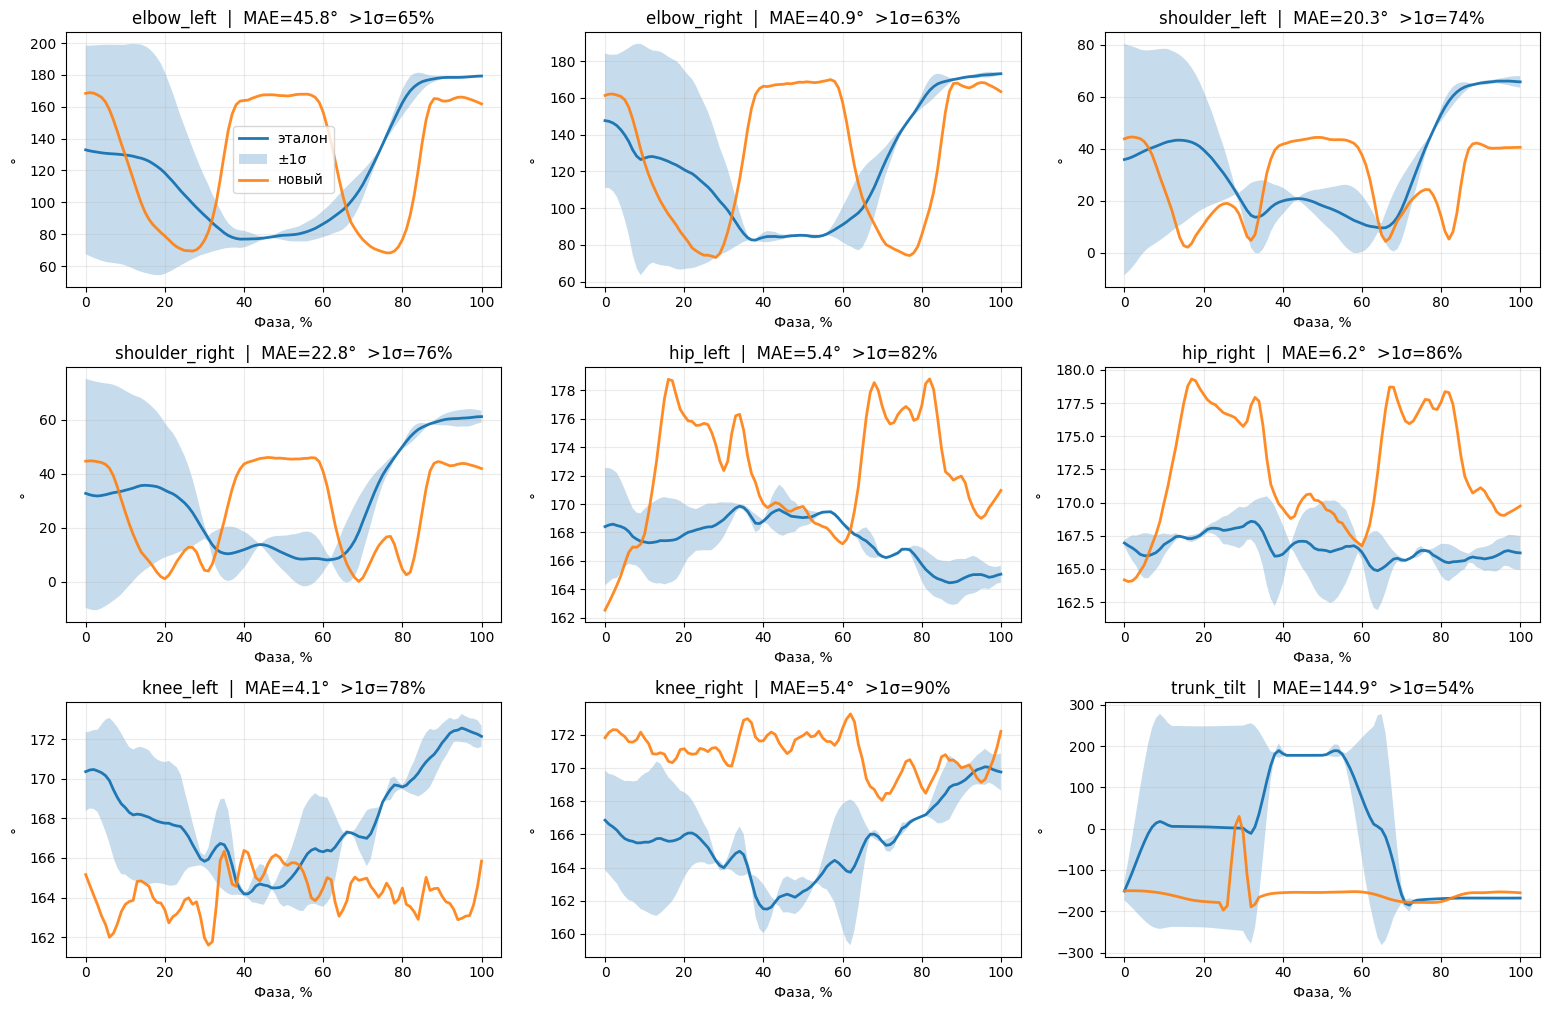

In [104]:
# (A) Визуализация текущего сравнения
plot_comparison_grid(
    [
        "elbow_left",
        "elbow_right",
        "shoulder_left",
        "shoulder_right",
        "hip_left",
        "hip_right",
        "knee_left",
        "knee_right",
        "trunk_tilt",
    ],
    new_profiles,
    ref_profiles,
    metrics,
    cols=3,
)

In [ ]:
def flip_trunk_if_better(curve, ref_mean):
    """Вернёт curve или -curve — что даёт меньший MAE к ref_mean."""
    e1 = np.mean(np.abs(curve - ref_mean))
    e2 = np.mean(np.abs(-curve - ref_mean))
    return curve if e1 <= e2 else (-curve)


def align_phase(curve, ref_mean, metric="mae"):
    """Находит циклический сдвиг (roll), минимизирующий ошибку к ref_mean."""
    n = len(curve)
    best = curve
    best_score = np.inf
    for k in range(n):
        rolled = np.roll(curve, k)
        if metric == "mae":
            score = np.mean(np.abs(rolled - ref_mean))
        else:  # mse
            score = np.mean((rolled - ref_mean) ** 2)
        if score < best_score:
            best_score, best = score, rolled
    return best


def postprocess_new_profiles(new_profiles, ref_profiles):
    """Применяет правки только там, где это оправдано."""
    out = {}
    for name, curve in new_profiles.items():
        if name not in ref_profiles:
            continue
        ref = ref_profiles[name].mean
        c = curve.copy()
        # 1) trunk_tilt: попробуем флип по знаку
        if name == "trunk_tilt":
            c = flip_trunk_if_better(c, ref)
        # 2) лёгкое выравнивание по фазе (всем углам полезно)
        c = align_phase(c, ref, metric="mae")
        out[name] = c
    return out

[SUMMARY after] MAE=29.45° | >1σ=71.3%


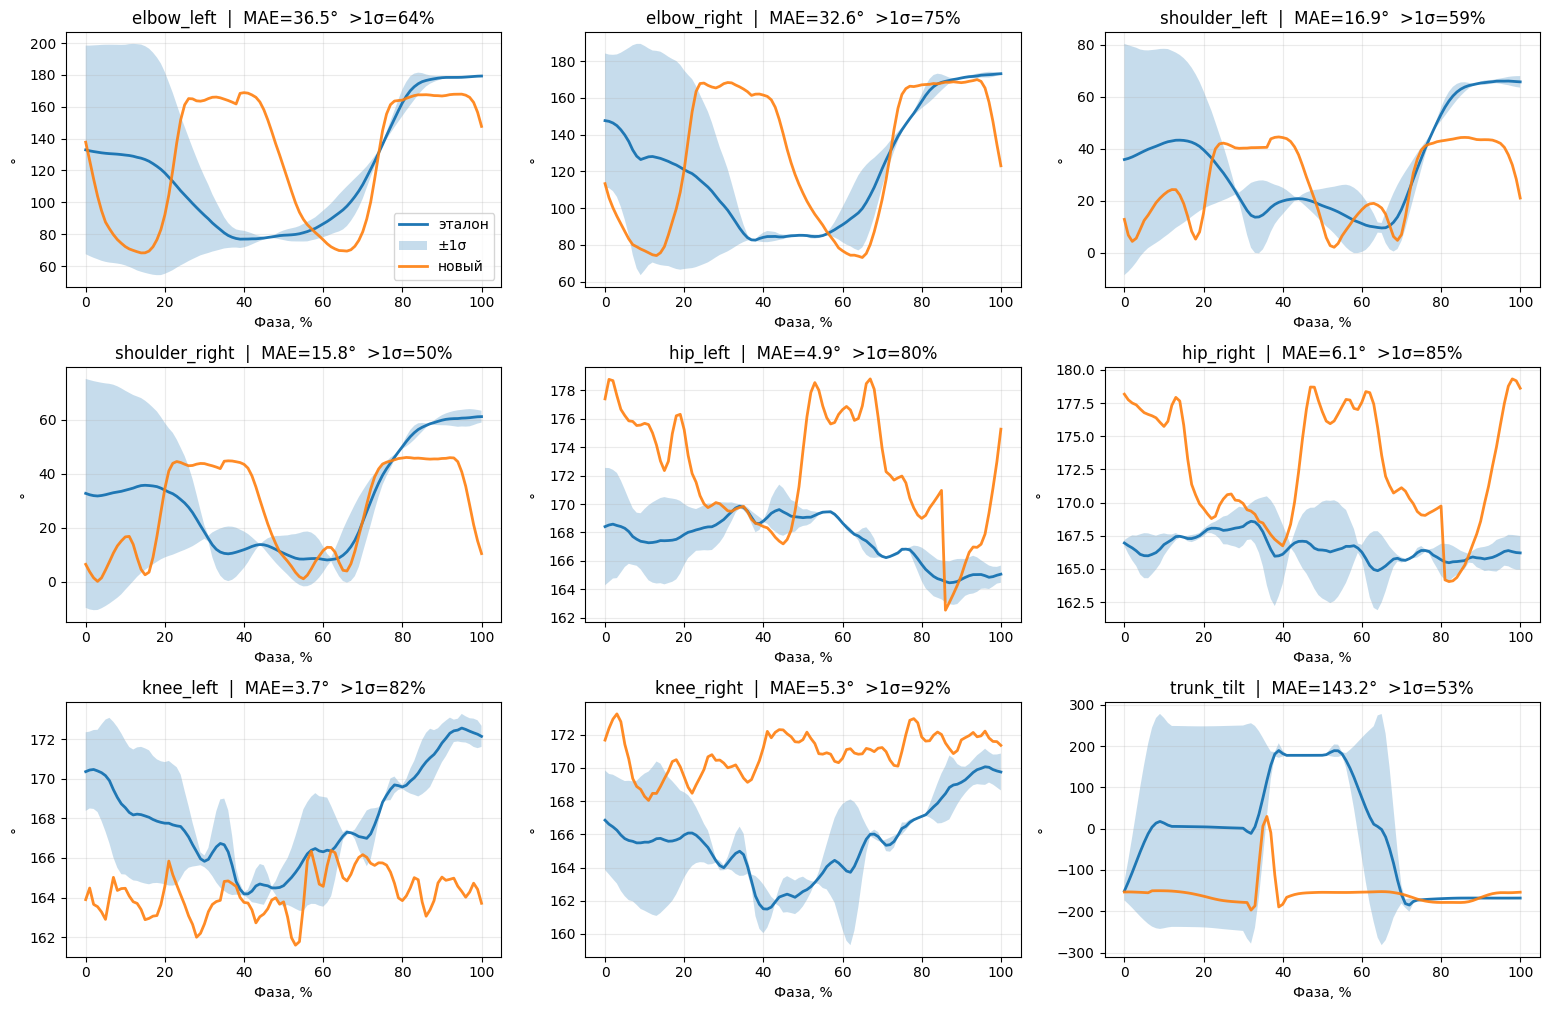

In [106]:
# (B) Опционально — авто-правки и повторная оценка
new_profiles_aligned = postprocess_new_profiles(new_profiles, ref_profiles)

# Пересчёт метрик после выравнивания:
metrics_after = {}
for a, curve in new_profiles_aligned.items():
    ref = ref_profiles[a]
    m = _compare_one(curve, ref)
    metrics_after[a] = {
        "mae": float(m.mae),
        "max_err": float(m.max_err),
        "pct_outside_1sigma": float(m.pct_outside_1sigma),
    }

overall_mae_after = np.mean([m["mae"] for m in metrics_after.values()])
overall_out_after = np.mean(
    [m["pct_outside_1sigma"] for m in metrics_after.values()]
)
print(
    f"[SUMMARY after] MAE={overall_mae_after:.2f}° | >1σ={overall_out_after:.1f}%"
)

# Визуализация уже выровненных профилей
plot_comparison_grid(
    [
        "elbow_left",
        "elbow_right",
        "shoulder_left",
        "shoulder_right",
        "hip_left",
        "hip_right",
        "knee_left",
        "knee_right",
        "trunk_tilt",
    ],
    new_profiles_aligned,
    ref_profiles,
    metrics_after,
    cols=3,
)

# Визуализация на скелете (скипаем)

In [33]:
# Используем кадр "дна", где локти максимально согнуты
t = t_min
pts = k_norm[t]
print(f"Frame {t}: визуализация всех углов")

# Цвета и легенда
CLR = {
    "elbow": "crimson",
    "shoulder": "tab:blue",
    "hip": "tab:green",
    "knee": "tab:orange",
    "trunk": "black",
}

legend_handles = [
    Line2D([0], [0], color=CLR["elbow"], lw=3, label="Локти"),
    Line2D([0], [0], color=CLR["shoulder"], lw=3, label="Плечи"),
    Line2D([0], [0], color=CLR["hip"], lw=3, label="Тазобедренные"),
    Line2D([0], [0], color=CLR["knee"], lw=3, label="Колени"),
    Line2D([0], [0], color=CLR["trunk"], lw=3, label="Корпус"),
]

Frame 254: визуализация всех углов


In [34]:
# функция для подписи угла
def draw_angle_arc(ax, A, B, C, color="C3", label=None, r=0.35):
    BA, BC = A - B, C - B
    u = BA / (np.linalg.norm(BA) + 1e-9)
    v = BC / (np.linalg.norm(BC) + 1e-9)
    ang_u, ang_v = np.arctan2(u[1], u[0]), np.arctan2(v[1], v[0])
    d = (ang_v - ang_u + 3 * np.pi) % (2 * np.pi) - np.pi
    theta = ang_u + np.linspace(0, d, 64)
    arc = np.vstack([B[0] + r * np.cos(theta), B[1] + r * np.sin(theta)]).T
    ax.plot(arc[:, 0], arc[:, 1], lw=2, color=color)
    if label:
        mid = arc[len(arc) // 2]
        ax.text(mid[0], mid[1], label, color=color, fontsize=10, weight="bold")

In [ ]:
# базовая функция рисования скелета
def draw_skeleton(ax, pts, title=""):
    for i, j in COCO_EDGES:
        if np.all(np.isfinite(pts[i])) and np.all(np.isfinite(pts[j])):
            ax.plot(
                [pts[i, 0], pts[j, 0]],
                [pts[i, 1], pts[j, 1]],
                lw=2,
                color="gray",
            )
    ax.scatter(pts[:, 0], pts[:, 1], s=28, color="orange")
    ax.set_aspect("equal", "box")
    ax.grid(True, alpha=0.2)
    ax.set_title(title)

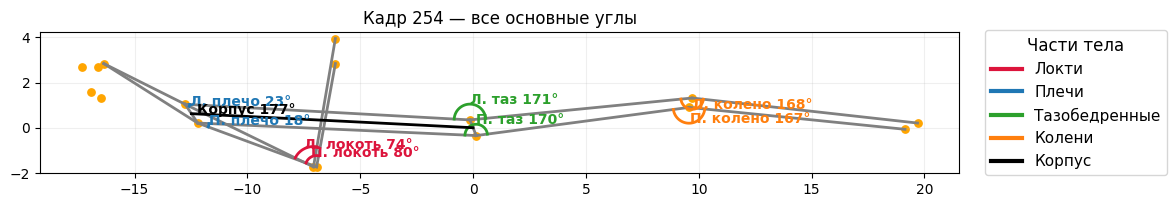

In [ ]:
# рисуем на кадре "дна"
fig, ax = plt.subplots(figsize=(14, 7))
draw_skeleton(ax, pts, title=f"Кадр {t} — все основные углы")

# 1. Локти
draw_angle_arc(
    ax,
    pts[LSH],
    pts[LEL],
    pts[LWR],
    color=CLR["elbow"],
    label=f"Л. локоть {angles['elbow_left'][t]:.0f}°",
    r=0.9,
)
draw_angle_arc(
    ax,
    pts[RSH],
    pts[REL],
    pts[RWR],
    color=CLR["elbow"],
    label=f"П. локоть {angles['elbow_right'][t]:.0f}°",
    r=0.5,
)

# 2. Плечи
draw_angle_arc(
    ax,
    pts[LEL],
    pts[LSH],
    pts[LHP],
    color=CLR["shoulder"],
    label=f"Л. плечо {angles['shoulder_left'][t]:.0f}°",
    r=0.2,
)
draw_angle_arc(
    ax,
    pts[REL],
    pts[RSH],
    pts[RHP],
    color=CLR["shoulder"],
    label=f"П. плечо {angles['shoulder_right'][t]:.0f}°",
    r=0.5,
)

# 3. Тазобедренные
draw_angle_arc(
    ax,
    pts[LSH],
    pts[LHP],
    pts[LKN],
    color=CLR["hip"],
    label=f"Л. таз {angles['hip_left'][t]:.0f}°",
    r=0.7,
)
draw_angle_arc(
    ax,
    pts[RSH],
    pts[RHP],
    pts[RKN],
    color=CLR["hip"],
    label=f"П. таз {angles['hip_right'][t]:.0f}°",
    r=0.5,
)

# 4. Колени
draw_angle_arc(
    ax,
    pts[LHP],
    pts[LKN],
    pts[LAN],
    color=CLR["knee"],
    label=f"Л. колено {angles['knee_left'][t]:.0f}°",
    r=0.5,
)
draw_angle_arc(
    ax,
    pts[RHP],
    pts[RKN],
    pts[RAN],
    color=CLR["knee"],
    label=f"П. колено {angles['knee_right'][t]:.0f}°",
    r=0.7,
)

# 5. Корпус
mid_sh = (pts[LSH] + pts[RSH]) / 2
mid_hp = (pts[LHP] + pts[RHP]) / 2
ax.plot(
    [mid_hp[0], mid_sh[0]], [mid_hp[1], mid_sh[1]], color=CLR["trunk"], lw=2
)
ax.text(
    mid_sh[0] + 0.25,
    mid_sh[1],
    f"Корпус {angles['trunk_tilt'][t]:.0f}°",
    color=CLR["trunk"],
    fontsize=10,
    weight="bold",
)

# легенда справа
ax.legend(
    handles=legend_handles,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    fontsize=11,
    title="Части тела",
    title_fontsize=12,
)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [52]:
def print_angles_for_frame(t):
    print(f"\nКадр {t}:")
    print(f"  Левый локоть:   {angles['elbow_left'][t]:6.1f}°")
    print(f"  Правый локоть:  {angles['elbow_right'][t]:6.1f}°")
    print(f"  Левое плечо:    {angles['shoulder_left'][t]:6.1f}°")
    print(f"  Правое плечо:   {angles['shoulder_right'][t]:6.1f}°")
    print(f"  Левый таз:      {angles['hip_left'][t]:6.1f}°")
    print(f"  Правый таз:     {angles['hip_right'][t]:6.1f}°")
    print(f"  Левое колено:   {angles['knee_left'][t]:6.1f}°")
    print(f"  Правое колено:  {angles['knee_right'][t]:6.1f}°")
    print(f"  Наклон корпуса: {angles['trunk_tilt'][t]:6.1f}°")

In [55]:
FRAME_IDX = [
    t_min,
    int(np.argmax((angles["elbow_left"] + angles["elbow_right"]) / 2)),
    len(angles["elbow_left"]) // 2,
]

for t in FRAME_IDX:
    t = int(np.clip(t, 0, len(angles["elbow_left"]) - 1))
    print_angles_for_frame(t)


Кадр 254:
  Левый локоть:     73.7°
  Правый локоть:    80.1°
  Левое плечо:      22.9°
  Правое плечо:     17.7°
  Левый таз:       171.2°
  Правый таз:      169.9°
  Левое колено:    168.0°
  Правое колено:   166.7°
  Наклон корпуса:  177.1°

Кадр 212:
  Левый локоть:    179.4°
  Правый локоть:   174.4°
  Левое плечо:      63.8°
  Правое плечо:     60.1°
  Левый таз:       165.5°
  Правый таз:      165.3°
  Левое колено:    172.8°
  Правое колено:   170.3°
  Наклон корпуса: -168.9°

Кадр 148:
  Левый локоть:     78.0°
  Правый локоть:    85.3°
  Левое плечо:      22.9°
  Правое плечо:     16.0°
  Левый таз:       169.5°
  Правый таз:      168.1°
  Левое колено:    164.2°
  Правое колено:   163.4°
  Наклон корпуса:  177.8°


# Какие модели и метрики:

Встроенный пресет, который автоматически подгружает:

    * детектор из mmdet (находит человека на кадре);  
    * модель позы из mmpose (предсказывает ключевые точки).
  
```python
inferencer = MMPoseInferencer(pose2d="human", device="cpu")
```
  
Для "human" используется RTMPose-m — “средняя” версия RTMPose.


MMPose публикует такие таблицы метрик (на COCO keypoints dataset) (mmpose==1.3.2, pose2d="human"):

| Модель    | AP (Average Precision) | PCK@0.1 | AUC   |
|:----------|:----------------------:|:-------:|------:|
| RTMPose-m | 75.8 %                 | 71.2%   |71.91 %|


